In [2]:
# Cell 0: make sure `root/` is on PYTHONPATH so `import src.*` works
import sys, pathlib

# if this notebook is in root/scripts, then parent is root
root = pathlib.Path().resolve().parent
sys.path.insert(0, str(root))

print("Added to sys.path:", root)

Added to sys.path: /home/graph-winit


In [3]:
# Cell 0.1: Imports for real data & model loading
import pathlib
import torch
import numpy as np
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import time

from src.explanationrunner import ExplanationRunner
from src.dataloader import Mimic, SimulatedSwitch, SimulatedState
from src.dataloader import Mimic, MITECG, SimulatedSwitch, SimulatedState, SimulatedSpike, \
    WinITDataset, SimulatedData, SimulatedL2X
from src.explainer.winitexplainers import WinITExplainer
from src.run import Params
import logging
logging.getLogger().setLevel(logging.INFO)


RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

In [5]:


cfg = OmegaConf.load('../config/nb_3_eval.yaml')
argdict = OmegaConf.to_container(cfg, resolve=True)

# argdict = vars(parser.parse_args())
data = argdict['data']
explainers = argdict['explainer']
skip_explain = argdict['skipexplain']
eval_explain = argdict['eval']
train_models = argdict['train']
train_gen = argdict['traingen']
result_file = argdict["resultfile"]
epoch_gen = argdict["epoch_gen"]

device = "cuda" if torch.cuda.is_available() else "cpu"

# parse the arg
params = Params(argdict)
dataset = params.datasets
model_args = params.model_args
model_train_args = params.model_train_args
all_explainer_dict = params.all_explainer_dict
out_path = params.outpath
ckpt_path = params.ckptpath
plot_path = params.plotpath
start_time = time.time()
log = logging.getLogger("Base")
for k, v in argdict.items():
    log.info(f"{k:15}: {v}")
first = True
save_failed = False


# overwrite a few things

base_path = pathlib.Path("/home/WinIT")  # adjust to your repo root


2025-06-24 16:09:16,720     INFO                      Base: data           : mitecg
2025-06-24 16:09:16,721     INFO                      Base: delay          : 0
2025-06-24 16:09:16,722     INFO                      Base: explainer      : ['winit', 'biwinit']
2025-06-24 16:09:16,723     INFO                      Base: cv             : [0]
2025-06-24 16:09:16,724     INFO                      Base: testbs         : 128
2025-06-24 16:09:16,725     INFO                      Base: dataseed       : 1234
2025-06-24 16:09:16,725     INFO                      Base: datapath       : ../data
2025-06-24 16:09:16,727     INFO                      Base: explainerseed  : 2345
2025-06-24 16:09:16,728     INFO                      Base: outpath        : ../output_nb/
2025-06-24 16:09:16,729     INFO                      Base: ckptpath       : ../ckpt/
2025-06-24 16:09:16,730     INFO                      Base: plotpath       : ../plots/
2025-06-24 16:09:16,730     INFO                      Base: logp

In [6]:

dataset.load_data()  # populates dataset.train_loader, dataset.val_loader, etc.

# 2) Create the runner and either train or load a pretrained model
runner = ExplanationRunner(
    dataset=dataset,
    device=device,
    out_path=out_path,
    ckpt_path=ckpt_path,
    plot_path=plot_path
)

# If you do need to train the model:
if train_models:
    runner.init_model(**model_args)
    runner.train_model(**model_train_args, use_all_times=True)
else:
    # Load a saved checkpoint
    runner.init_model(**model_args)
    runner.load_model(use_all_times=True)

print("✔️  Dataset loaded and model ready. ")


Num after 0 tensor(75011)
Num after 1 tensor(15326)
Train class counts: {0: 60008, 1: 12261}
Test  class counts: {0: 15003, 1: 3065}


/home/anaconda3/envs/winit/lib/python3.9/site-packages/torch/nn/modules/linear.py:125: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  return F.linear(input, self.weight, self.bias)
2025-06-24 16:09:32,834     INFO         ExplanationRunner: Average Accuracy = 0.6332±0.0000
2025-06-24 16:09:32,838     INFO         ExplanationRunner: Model Accuracy on Tests = [0.633191].
2025-06-24 16:09:32,839     INFO         ExplanationRunner: Average AUC 

✔️  Dataset loaded and model ready. 


In [7]:
dl = runner.dataset.train_loaders
for cv, cv_dataloader in enumerate(dl):
    # x_batch: Tensor of shape (batch_size, …)
    # y_batch: Tensor of shape (batch_size, …)
    # Your training or eval code here
    print(f"cv {cv}")
    for batch_idx, x in enumerate(cv_dataloader):
        print(type(x))
        # print(x[0].shape)
        # print(x[1].shape)



cv 0
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<clas

In [11]:
x[1][1]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

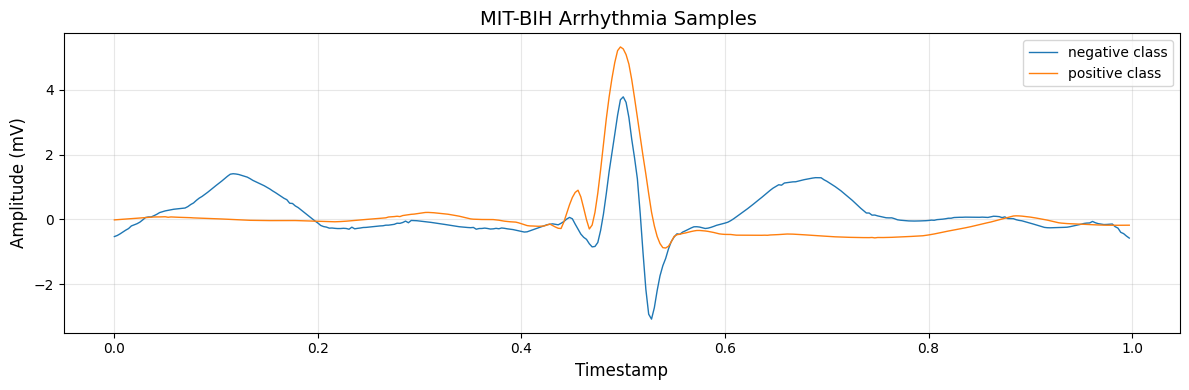

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# assume x is your batch: x.shape == (B, C, T)
# here we grab the first example, first channel, and move to CPU+NumPy
signal_1 = x[0][1].squeeze().cpu().numpy()
signal_0 = x[0][0].squeeze().cpu().numpy()

# if you know the sampling rate, you can convert sample‐index to seconds:
fs = 360.0  # MIT-BIH is 360 Hz
times = np.arange(signal_0.size) / fs

plt.figure(figsize=(12, 4))
plt.plot(times, signal_0, label="negative class", color="C0", linewidth=1)
plt.plot(times, signal_1, label="positive class", color="C1", linewidth=1)

plt.title("MIT-BIH Arrhythmia Samples ", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Amplitude (mV)", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


In [40]:
# Cell 0.4: Train or load the WinIT generators
if train_gen:
    # This will train feature‐generators (WinIT’s internal LSTMs/Gaussian generators)
    runner.train_generators(dataset.train_loader, dataset.val_loader)
else:
    for explainer_name, explainer_dict_list in all_explainer_dict.items():
        for explainer_dict in explainer_dict_list:
            # generate feature importance
            runner.clean_up(clean_importance=True, clean_explainer=True, clean_model=False)
            runner.get_explainers(explainer_name, explainer_dict=explainer_dict)
            runner.set_model_for_explainer(set_eval=explainer_name != "fit")

            if not skip_explain:
                log.info(f"Running Explanations..."
                            f"Data={dataset.get_name()}, Explainer={explainer_name}, Dict={explainer_dict}")

                runner.load_generators()
                runner.run_attributes()
                runner.save_importance()
                importances = runner.importances
                log.info("Explanations done.")


               




2025-06-23 11:41:02,778     INFO                      Base: Running Explanations...Data=simulated_state, Explainer=winit, Dict={'window_size': 10, 'joint': False, 'conditional': False, 'usedatadist': True, 'random_state': 2345, 'metric': 'pd'}
2025-06-23 11:41:03,111     INFO          OGWinITExplainer: Generator Test MSE Loss: 1.2824319700400035
CV=0 batches:   0%|          | 0/2 [00:00<?, ?it/s]/home/anaconda3/envs/winit/lib/python3.9/site-packages/torch/nn/modules/linear.py:125: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#res

attribution done, scores.shape, iSabThick_array.shape,  iSabThickwithoutInit_array.shape,  IS_array.shape (128, 3, 100, 10) (128, 3, 100, 10) (128, 3, 100, 10) (128, 3, 100, 10)


Time-step loop: 100%|██████████| 100/100 [02:39<00:00,  1.59s/it]
2025-06-23 11:48:20,628     INFO          BiWinITExplainer: Importance scoring of the batch done: Time elapsed: 159.1368
CV=0 batches: 100%|██████████| 2/2 [05:19<00:00, 159.92s/it]
2025-06-23 11:48:20,646     INFO         ExplanationRunner: Saving file to ../output_nb/gru1layer/simulated_state/biwinit_window_10_pd_usedatadist_test_importance_scores_0.pkl
2025-06-23 11:48:20,660     INFO         ExplanationRunner: Saving extra '0' for CV=iSab to ../output_nb/gru1layer/simulated_state/iSab_0.pkl
2025-06-23 11:48:20,672     INFO         ExplanationRunner: Saving extra '0' for CV=IS to ../output_nb/gru1layer/simulated_state/IS_0.pkl
2025-06-23 11:48:20,684     INFO                      Base: Explanations done.


attribution done, scores.shape, iSabThick_array.shape,  iSabThickwithoutInit_array.shape,  IS_array.shape (72, 3, 100, 10) (72, 3, 100, 10) (72, 3, 100, 10) (72, 3, 100, 10)
✔️  Generator models are ready. 


In [39]:
runner.explainers

{0: <src.explainer.biwinitexplainers.BiWinITExplainer at 0x74b3010daf40>}

In [24]:

test_iterator = iter(dataset.test_loader)
x_batch, y_batch = next(test_iterator)  # (batch_size, features, timesteps), (batch_size,)

x_batch = x_batch.to(device)
print(f"✔️  Fetched one batch: x_batch.shape = {x_batch.shape}, y_batch.shape = {y_batch.shape}")

exps = runner.explainers
cv = 0
explainer = exps[cv]

# Cell 0.7: Sanity‐check prediction on our sample
with torch.no_grad():
    p_test = explainer._model_predict(x_batch)
# print("Model output probabilities:", p_test.cpu().numpy())


✔️  Fetched one batch: x_batch.shape = torch.Size([128, 3, 100]), y_batch.shape = torch.Size([128, 100])


/home/anaconda3/envs/winit/lib/python3.9/site-packages/torch/nn/modules/linear.py:125: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:233.)
  return F.linear(input, self.weight, self.bias)


In [35]:
runner.explainers
exps.items()

dict_items([(0, <src.explainer.biwinitexplainers.BiWinITExplainer object at 0x74b342515af0>)])

## read importance scores

In [43]:
for explainer_name, explainer_dict_list in all_explainer_dict.items():
    for explainer_dict in explainer_dict_list:
             
        log.info("Evaluating importance...")
        log.info(f"Data={dataset.get_name()}, Explainer={explainer_name}")
        if runner.importances is None:
            runner.load_importance()
        if isinstance(dataset, SimulatedData):
            df = runner.evaluate_simulated_importance(argdict["aggregate"])

        log.info("Evaluating importance done.")

2025-06-23 11:51:34,641     INFO                      Base: Evaluating importance...
2025-06-23 11:51:34,643     INFO                      Base: Data=simulated_state, Explainer=winit
2025-06-23 11:51:34,724     INFO         ExplanationRunner: cv=0
2025-06-23 11:51:34,725     INFO         ExplanationRunner: Auroc               : 0.5051
2025-06-23 11:51:34,726     INFO         ExplanationRunner: Avpr                : 0.0193
2025-06-23 11:51:34,726     INFO         ExplanationRunner: Auprc               : 0.0193
2025-06-23 11:51:34,727     INFO         ExplanationRunner: Mean rank           : 147.1502
2025-06-23 11:51:34,728     INFO         ExplanationRunner: Mean rank (min)     : 147.1502
2025-06-23 11:51:34,728     INFO         ExplanationRunner: Pos ratio           : 5.6250
/home/anaconda3/envs/winit/lib/python3.9/site-packages/torch/nn/modules/linear.py:125: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDete

In [44]:
sample_idx = 1
extra_scores = runner.extra_scores
extra_scores['iSab'][cv].shape
extra_scores['IS'][cv].shape


iSab_all = extra_scores['iSab'][cv][sample_idx]   # [key][cv][sample_idx]
IS_all = extra_scores['IS'][cv][sample_idx]   # [key][cv][sample_idx]
scores = importances[cv][sample_idx]
scores.shape


(3, 100, 10)

## Plotting

### Plot @ timestamp

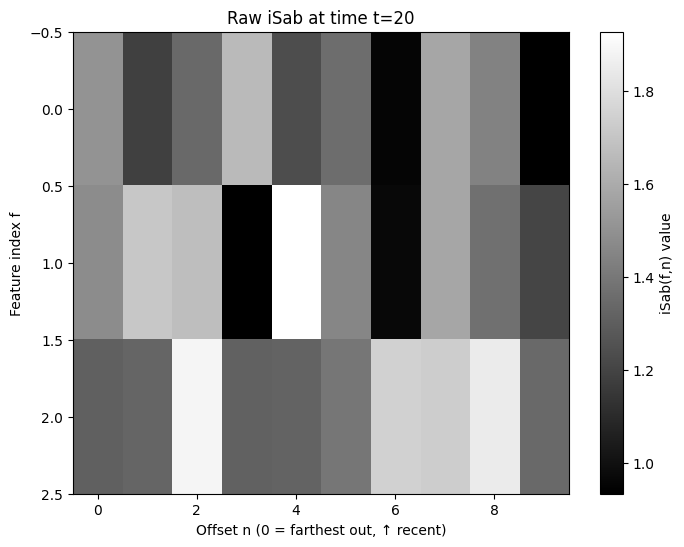

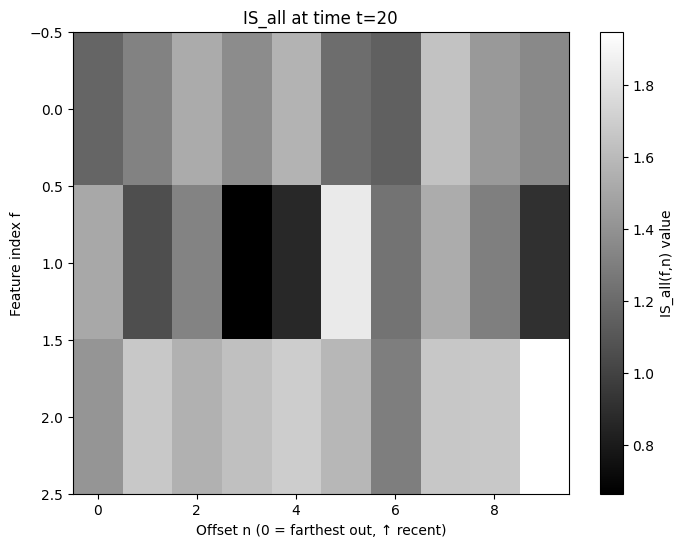

In [45]:
# Cell 3: Visualize iSab at a chosen time t0 (e.g. t0=20) as a heatmap
t0 = 20
data_matrix = iSab_all[:,t0,:]    

plt.figure(figsize=(8, 6))
im = plt.imshow(data_matrix, aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(f,n) value")
plt.xlabel("Offset n (0 = farthest out, ↑ recent)")
plt.ylabel("Feature index f")
plt.title(f"Raw iSab at time t={t0}")
plt.show()


data_matrix = IS_all[:,t0,:]    

plt.figure(figsize=(8, 6))
im = plt.imshow(data_matrix, aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(f,n) value")
plt.xlabel("Offset n (0 = farthest out, ↑ recent)")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time t={t0}")
plt.show()



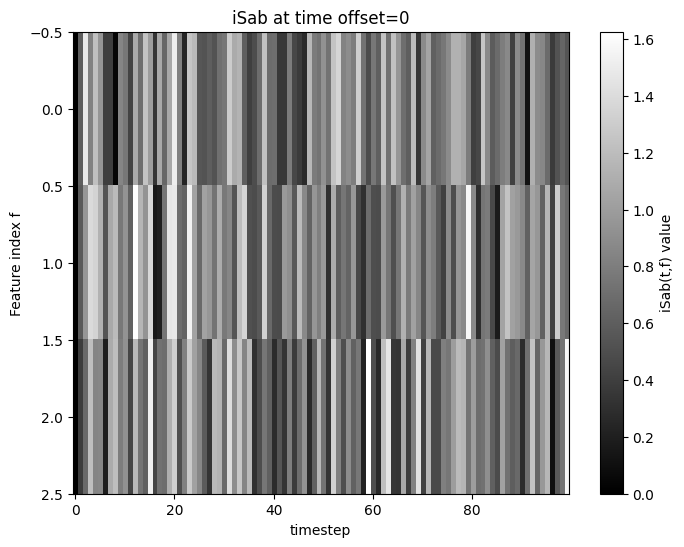

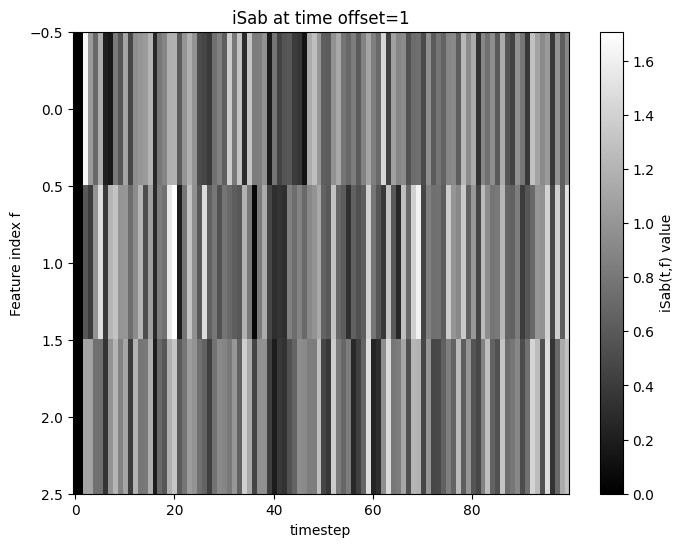

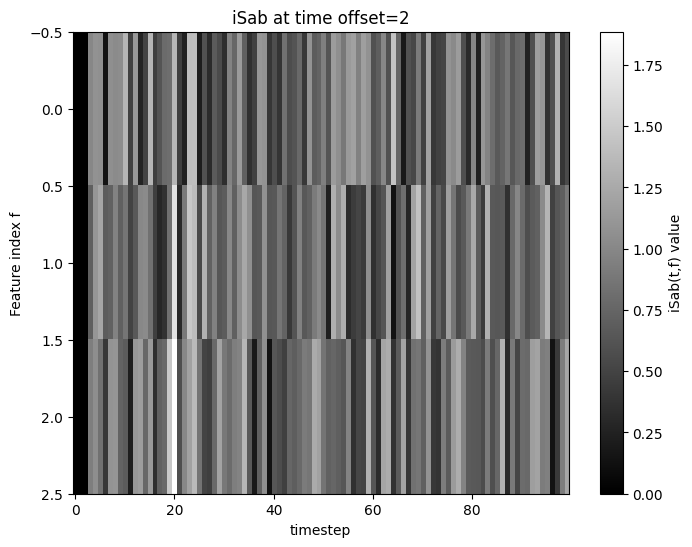

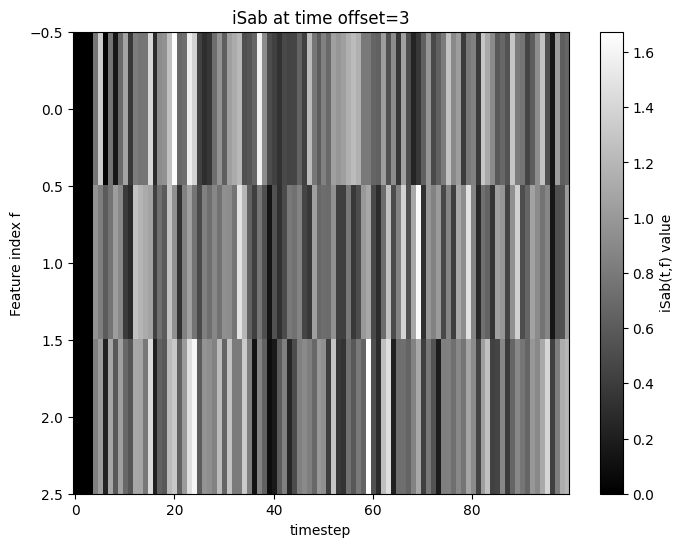

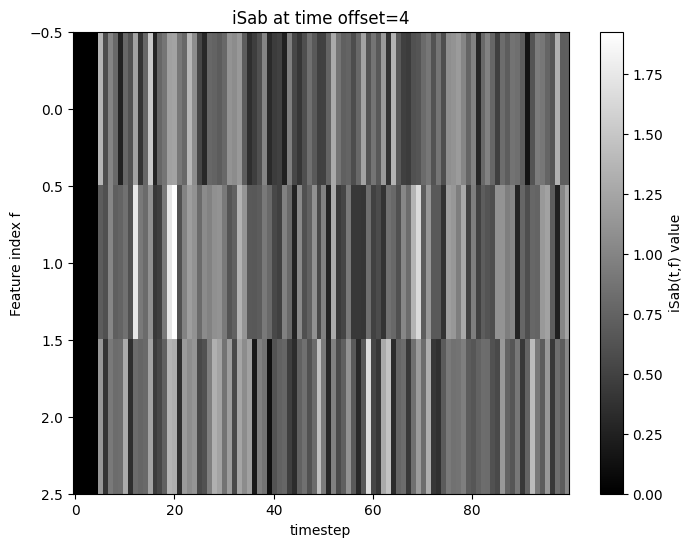

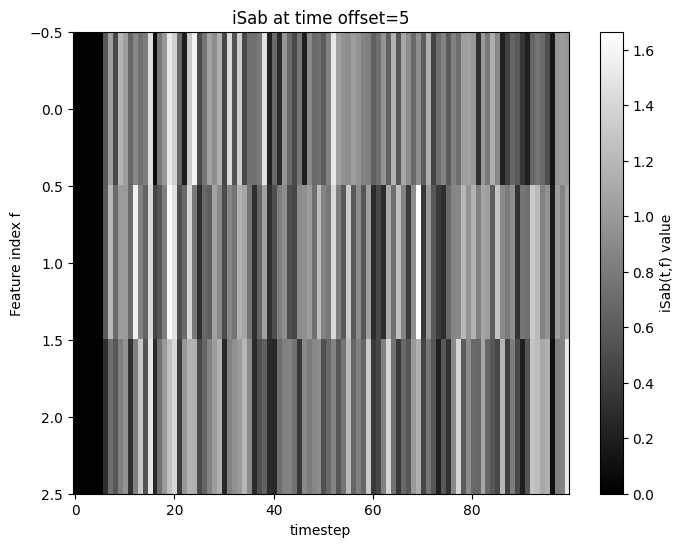

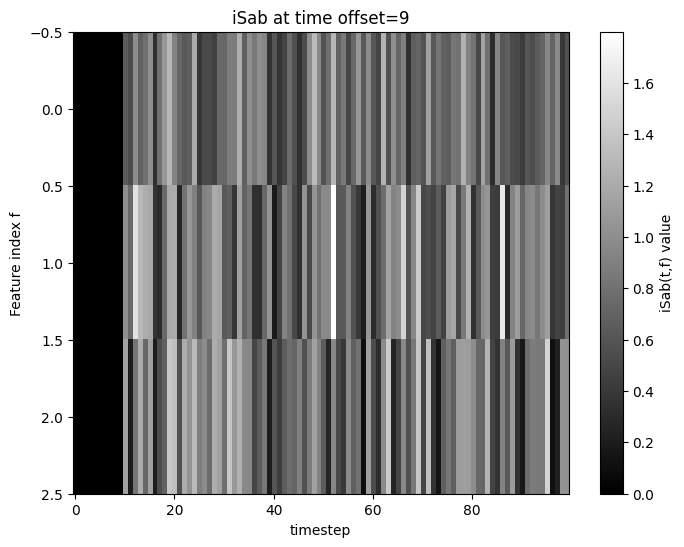

In [32]:
#iSab at different offsets
offset = 0
plt.figure(figsize=(8, 6))
im = plt.imshow(iSab_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"iSab at time offset={offset}")
plt.show()
offset = 1
plt.figure(figsize=(8, 6))
im = plt.imshow(iSab_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"iSab at time offset={offset}")
plt.show()
offset = 2
plt.figure(figsize=(8, 6))
im = plt.imshow(iSab_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"iSab at time offset={offset}")
plt.show()
offset = 3
plt.figure(figsize=(8, 6))
im = plt.imshow(iSab_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"iSab at time offset={offset}")
plt.show()

offset = 4
plt.figure(figsize=(8, 6))
im = plt.imshow(iSab_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"iSab at time offset={offset}")
plt.show()

offset = 5
plt.figure(figsize=(8, 6))
im = plt.imshow(iSab_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"iSab at time offset={offset}")
plt.show()

offset = 9
plt.figure(figsize=(8, 6))
im = plt.imshow(iSab_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="iSab(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"iSab at time offset={offset}")
plt.show()




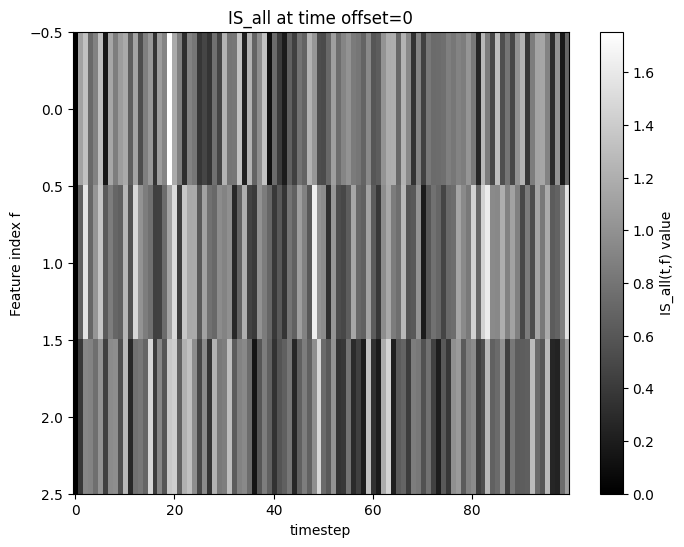

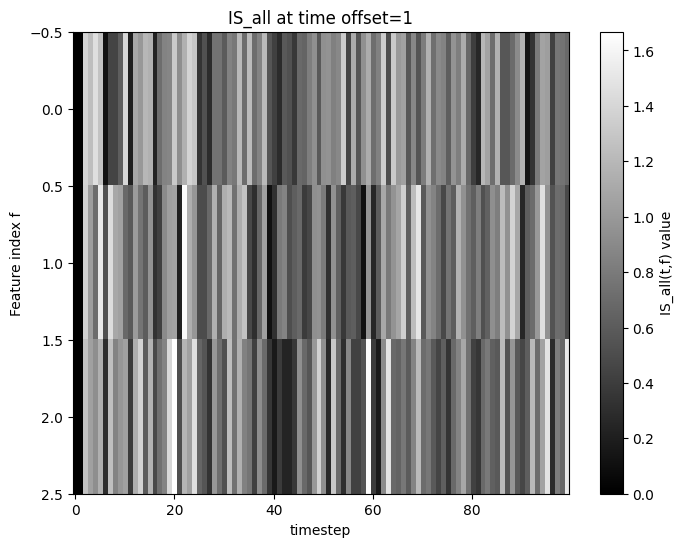

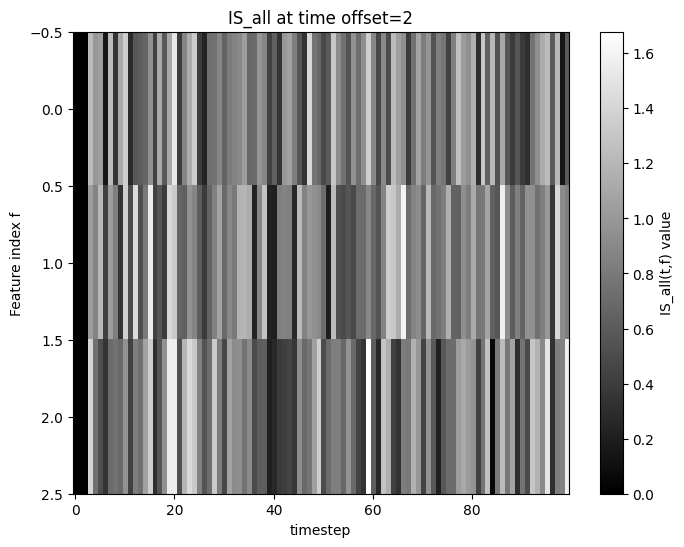

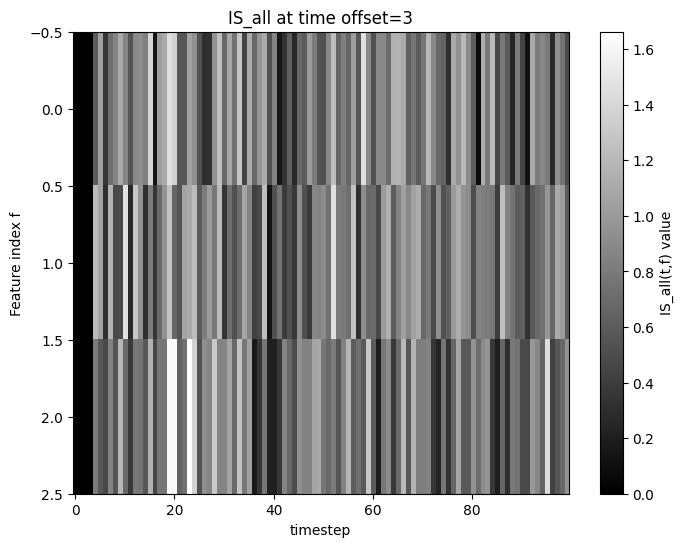

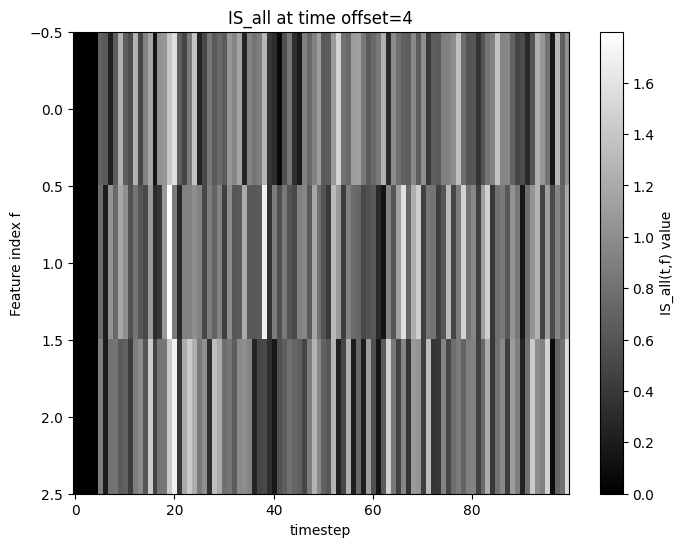

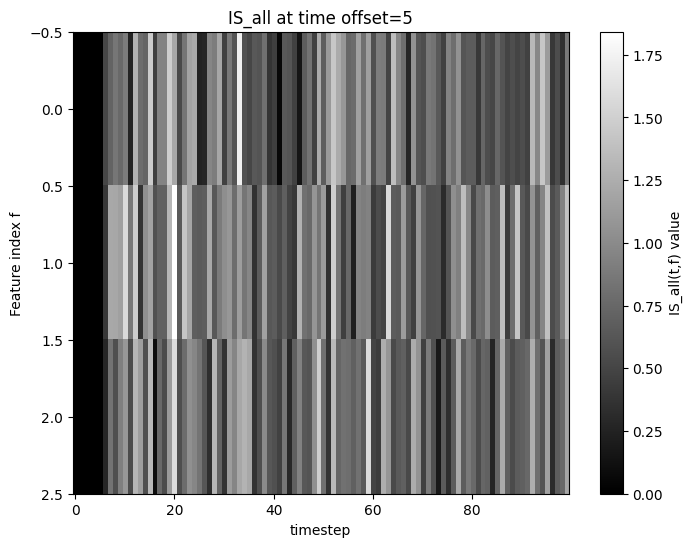

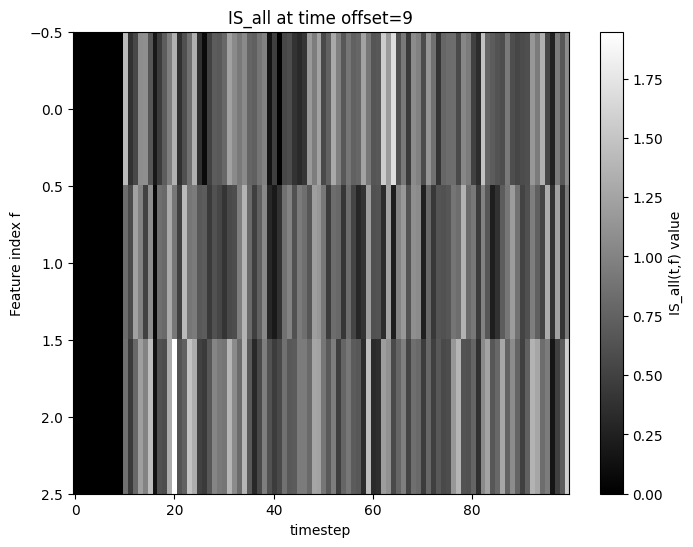

In [33]:
#iSab at different offsets
offset = 0
plt.figure(figsize=(8, 6))
im = plt.imshow(IS_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time offset={offset}")
plt.show()
offset = 1
plt.figure(figsize=(8, 6))
im = plt.imshow(IS_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time offset={offset}")
plt.show()
offset = 2
plt.figure(figsize=(8, 6))
im = plt.imshow(IS_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time offset={offset}")
plt.show()
offset = 3
plt.figure(figsize=(8, 6))
im = plt.imshow(IS_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time offset={offset}")
plt.show()

offset = 4
plt.figure(figsize=(8, 6))
im = plt.imshow(IS_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time offset={offset}")
plt.show()

offset = 5
plt.figure(figsize=(8, 6))
im = plt.imshow(IS_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time offset={offset}")
plt.show()

offset = 9
plt.figure(figsize=(8, 6))
im = plt.imshow(IS_all[:, :, offset], aspect='auto', cmap='gray')
plt.colorbar(im, label="IS_all(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f"IS_all at time offset={offset}")
plt.show()




(3, 100, 10)
(3, 100, 4)


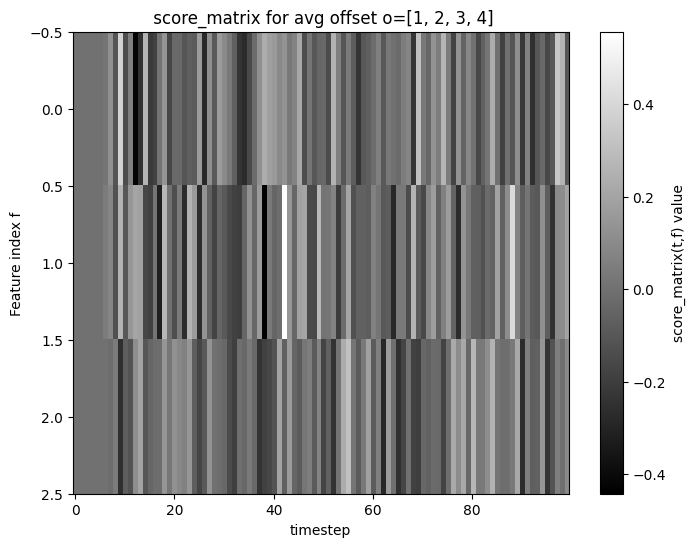

In [34]:
# compare against the final_score obtained
print(scores.shape) #(b,f,t,w)

offsets = [1,2,3,4]

print(scores[ :, :, offsets].shape)
score_matrix = scores[ :, :, offsets].mean(axis=2)


plt.figure(figsize=(8, 6))
im = plt.imshow(score_matrix, aspect='auto', cmap='gray',
                # vmin=vmin,
                # vmax=vmax
                )

# cbar = plt.colorbar(im, label="score_matrix(t, f) value")
# cbar.set_clim(0, 2)  # enforce the same limits on the colorbar
plt.colorbar(im, label="score_matrix(t,f) value")
plt.xlabel("timestep")
plt.ylabel("Feature index f")
plt.title(f" score_matrix for avg offset o={offsets}")
plt.show()


In [31]:
iSab_all.shape

(3, 80, 10)

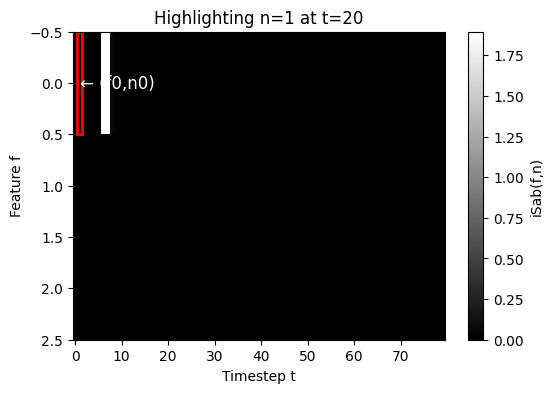

In [36]:
# Cell 4: Overlay “which cells” correspond to a particular (feature f0, offset n0):
n0 = 1
f0 = 0
plt.figure(figsize=(6, 4))
im = plt.imshow(iSab_all[:,:, n0], aspect="auto", cmap="gray")
plt.colorbar(im, label="iSab(f,n)")
# draw a red rectangle around cell (f0, n0)
rect = plt.Rectangle((n0 - 0.5, f0 - 0.5), 1, 1, edgecolor="red", facecolor="none", lw=2)
plt.gca().add_patch(rect)
plt.text(n0, f0, "← (f0,n0)", color="white", va="center", ha="left", fontsize=12)
plt.xlabel("Timestep t")
plt.ylabel("Feature f")
plt.title(f"Highlighting n={n0} at t={t0}")
plt.show()


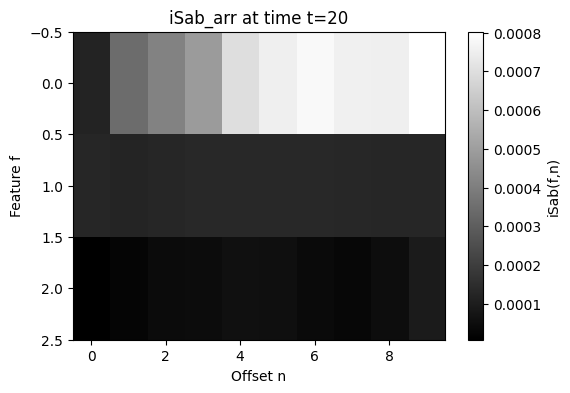

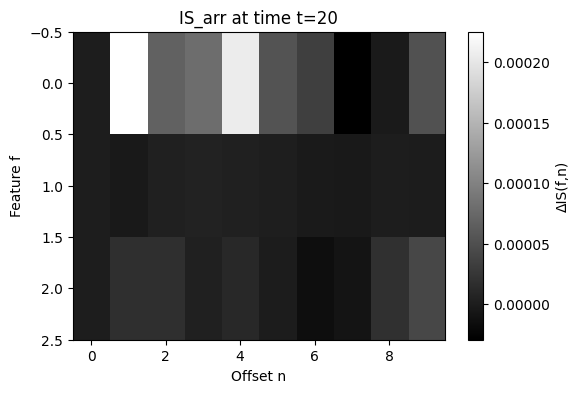

In [40]:
# Cell 5: Visualize iSab_arr at the same t0
iSab_arr = iSab_all[:,t0,:]  # shape (f × w_max)

plt.figure(figsize=(6, 4))
im2 = plt.imshow(iSab_arr, aspect="auto", cmap="gray")
plt.colorbar(im2, label="iSab(f,n)")
plt.xlabel("Offset n")
plt.ylabel("Feature f")
plt.title(f"iSab_arr at time t={t0}")
plt.show()

# Cell 5: Visualize iS_array (differenced) at the same t0
IS_arr = IS_all[:,t0,:]  # shape (f × w_max)

plt.figure(figsize=(6, 4))
im2 = plt.imshow(IS_arr, aspect="auto", cmap="gray")
plt.colorbar(im2, label="ΔIS(f,n)")
plt.xlabel("Offset n")
plt.ylabel("Feature f")
plt.title(f"IS_arr at time t={t0}")
plt.show()


In [43]:
scores.shape

(3, 80, 10)

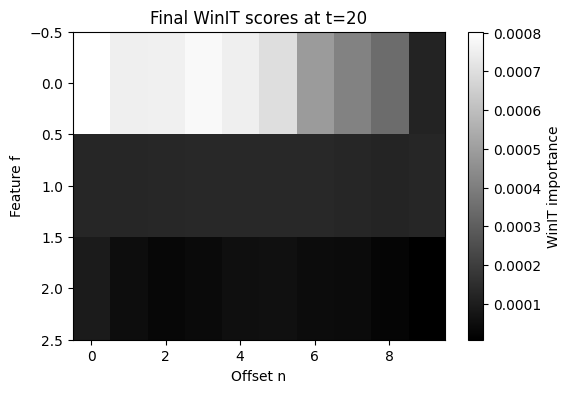

In [44]:
# Cell 7: Visualize the final WinIT “score tensor” for sample index=0
# final_scores shape: (1, f, T, w_max). Drop batch‐axis ⇒ (f, T, w_max)

t_show = 20            # pick a time slice to visualize (f × w_max)
slice_f_w = scores[ :, t_show, :]  # shape (f × w_max)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
im3 = ax.imshow(slice_f_w, aspect="auto", cmap="gray")
ax.set_title(f"Final WinIT scores at t={t_show}")
ax.set_xlabel("Offset n")
ax.set_ylabel("Feature f")
plt.colorbar(im3, label="WinIT importance")
plt.show()

# Optionally, show how the full 4D tensor could be “rolled out”
# into a large grid of (time × window) vs feature, but that can be memory‐heavy.


### Plots over time

NameError: name 'iS_array_all' is not defined

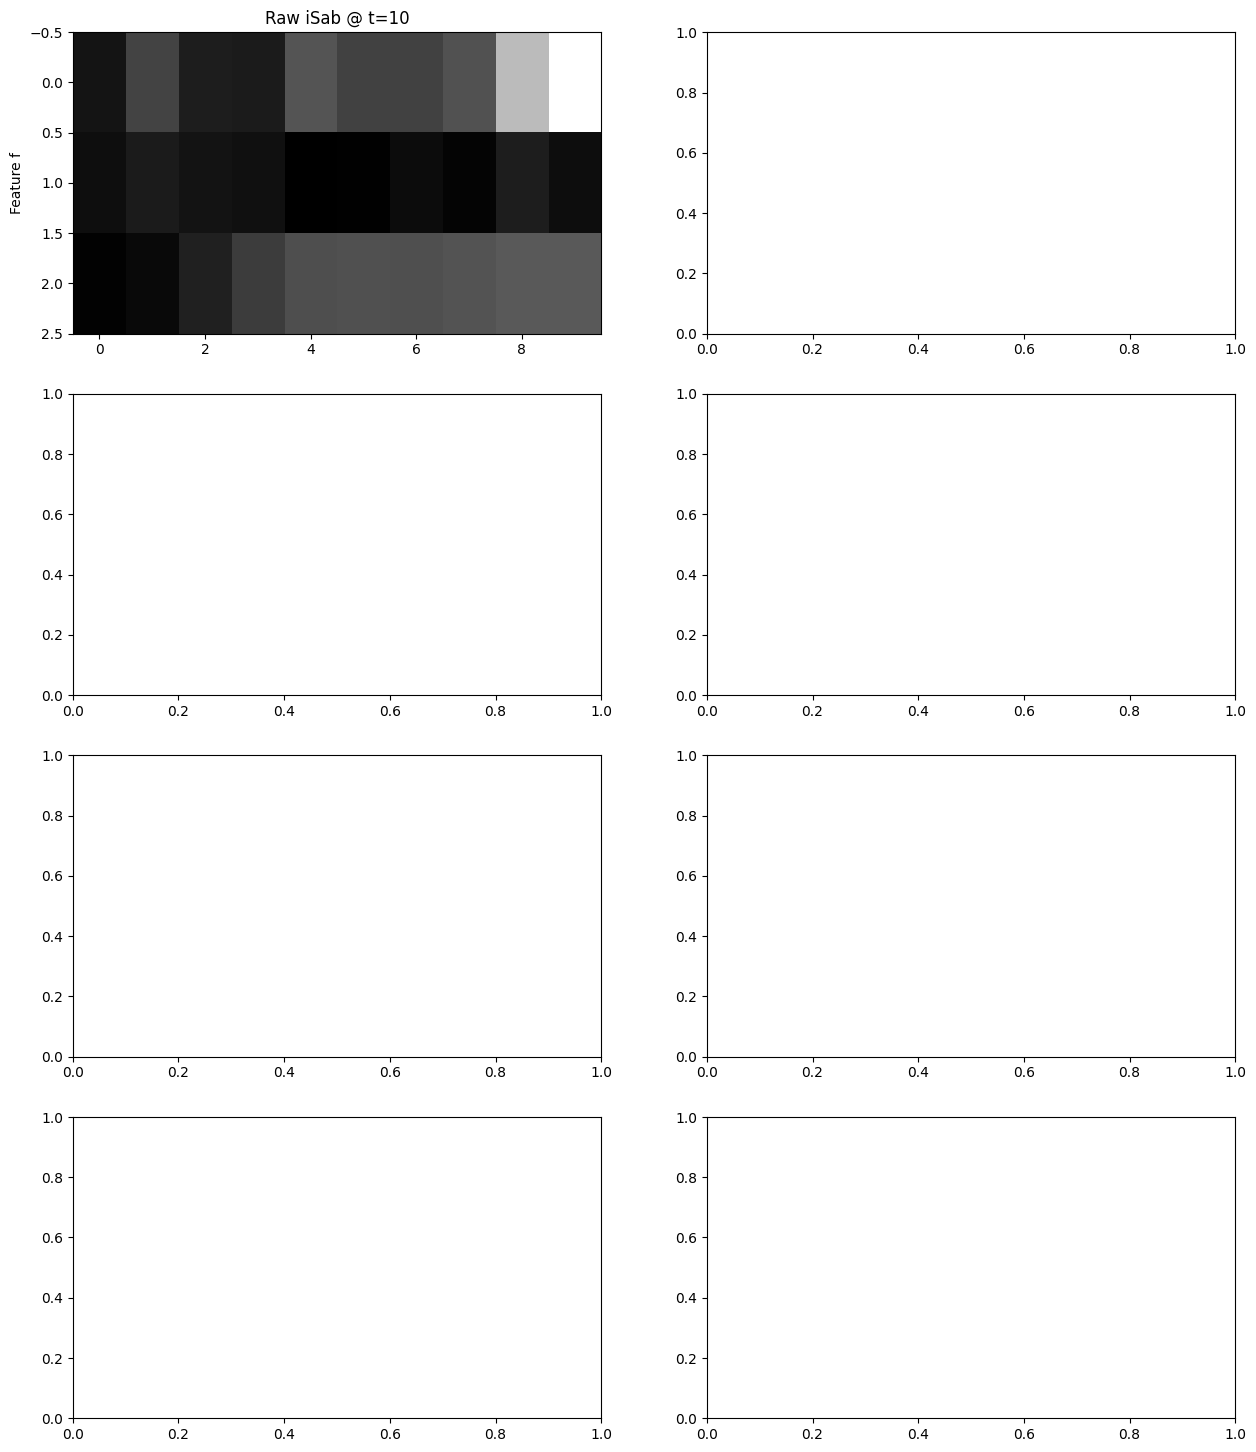

In [47]:
# Cell 6: Show how “window size” changes the shape of iS_array over all t
# We’ll plot a small grid of snapshots at t = [10, 20, 30, 40], for instance.
times_to_plot = [10, 20, 30, 40]
n_rows = len(times_to_plot)
n_cols = 2  # one for raw iSab, one for iS_array
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 18))

for r, t_plot in enumerate(times_to_plot):
    # raw iSab
    im0 = axes[r, 0].imshow(iSab_all[t_plot,:,:,0], aspect="auto", cmap="gray")
    axes[r, 0].set_title(f"Raw iSab @ t={t_plot}")
    if r == n_rows - 1:
        axes[r, 0].set_xlabel("Offset n")
    axes[r, 0].set_ylabel("Feature f")

    # differenced iS_array
    im1 = axes[r, 1].imshow(iS_array_all[t_plot], aspect="auto", cmap="gray")
    axes[r, 1].set_title(f"Differenced ΔI @ t={t_plot}")
    if r == n_rows - 1:
        axes[r, 1].set_xlabel("Offset n")
    # no y‐label on right column

# Add a colorbar on the right side for all iS_array subplots
fig.colorbar(im1, ax=axes[:, 1], orientation="vertical", fraction=0.02, label="ΔI")

# plt.tight_layout()
plt.show()


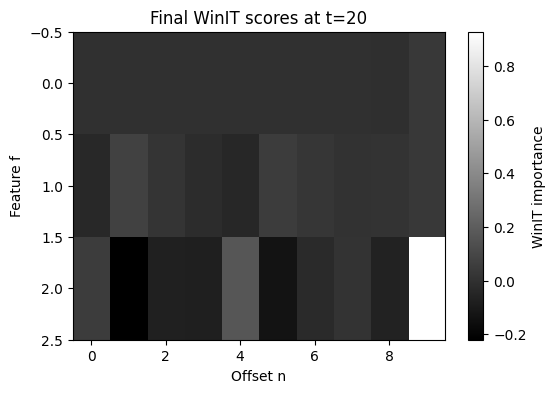

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assume iSab_all is already computed and has shape (T, F, w_max)
num_timesteps = len(iSab_all)
num_features = iSab_all[0].shape[0]
w_max        = iSab_all[0].shape[1]

# Build full_iSab[f, t, n]
full_iSab = np.zeros((num_features, num_timesteps, w_max))
for t in range(num_timesteps):
    raw_mat = iSab_all[t]  # shape (F, w_max)
    w_t = raw_mat.shape[1]
    full_iSab[:, t, :w_t] = raw_mat

offsets_to_plot = list(range(w_max))  # all offsets

n_cols = 3
n_rows = int(np.ceil(len(offsets_to_plot) / n_cols))

# Here we set height_ratios so each row is relatively short
height_ratios = [100]*n_rows # all rows equal, but figure height is small
fig, axes = plt.subplots(
    n_rows, n_cols, 
    figsize=(4 * n_cols, 1 * n_rows),  # smaller total height
    sharex=True, sharey=True,
    gridspec_kw={'height_ratios': height_ratios}
)
axes = axes.flatten()

for idx, n in enumerate(offsets_to_plot):
    ax = axes[idx]
    mat = full_iSab[:, :, n]  # shape (F, T)
    im = ax.imshow(mat, aspect='auto', cmap='gray', origin='lower')
    ax.set_title(f"Offset n = {n}", fontsize=10)
    ax.set_ylabel("Feature f", fontsize=8)
    ax.set_xlabel("Time t", fontsize=8)
    ax.set_yticks(np.arange(num_features))
    ax.set_yticklabels(np.arange(num_features), fontsize=6)
    ax.set_xticks(np.linspace(0, num_timesteps - 1, 5).astype(int))
    ax.set_xticklabels(
        np.linspace(0, num_timesteps - 1, 5).astype(int), 
        fontsize=6
    )
    # individual colorbar (optional, but you can omit if you want to save space)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)
    cbar.ax.tick_params(labelsize=6)

# Hide any extra axes
for j in range(len(offsets_to_plot), n_rows*n_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


ValueError: could not broadcast input array from shape (3,10,128) into shape (3,10)

In [21]:
# Cell: For each offset n, plot iSab heatmap (feature × time) and adjoining schematic grid highlighting (feature f0, time window)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assume iSab_all has shape [T][F, w_max], and we know num_features, num_timesteps, w_max
num_timesteps = len(iSab_all)
num_features = iSab_all[0].shape[0]
w_max        = iSab_all[0].shape[1]

# Build full_iSab[f, t, n] as before
full_iSab = np.zeros((num_features, num_timesteps, w_max))
for t in range(num_timesteps):
    raw_mat = iSab_all[t]  # shape (F, w_max)
    w_t = raw_mat.shape[1]
    full_iSab[:, t, :w_t] = raw_mat

# Choose offsets to visualize and a feature of interest f0
offsets_to_plot = list(range(w_max))  # e.g. [0,1,...,w_max-1]
f0 = 2       # pick a specific feature index to highlight
t0 = 20      # pick a fixed time index

n_rows = len(offsets_to_plot)
fig, axes = plt.subplots(n_rows, 2, figsize=(8, 2 * n_rows),
                         gridspec_kw={'width_ratios':[2, 1]})

for row, n in enumerate(offsets_to_plot):
    # --- Left: iSab heatmap for offset n (feature × time) ---
    ax_hm = axes[row, 0]
    mat = full_iSab[:, :, n]  # shape (F, T)
    im = ax_hm.imshow(mat, aspect='auto', cmap='gray', origin='lower')
    ax_hm.set_title(f"iSab (f × t) at offset n={n}", fontsize=10)
    ax_hm.set_ylabel("Feature f", fontsize=8)
    ax_hm.set_xlabel("Time t", fontsize=8)
    ax_hm.set_yticks(np.arange(num_features))
    ax_hm.set_yticklabels(np.arange(num_features), fontsize=6)
    ax_hm.set_xticks(np.linspace(0, num_timesteps - 1, 5).astype(int))
    ax_hm.set_xticklabels(
        np.linspace(0, num_timesteps - 1, 5).astype(int), 
        fontsize=6
    )
    # Colorbar
    cbar = fig.colorbar(im, ax=ax_hm, fraction=0.046, pad=0.02)
    cbar.ax.tick_params(labelsize=6)

    # --- Right: schematic grid with highlighted box for (f0, [t0-n .. t0]) ---
    ax_sch = axes[row, 1]
    # Draw light gray grid
    ax_sch.set_xlim(-0.5, num_timesteps - 0.5)
    ax_sch.set_ylim(-0.5, num_features - 0.5)
    ax_sch.set_xticks(np.arange(0, num_timesteps, 1))
    ax_sch.set_yticks(np.arange(0, num_features, 1))
    ax_sch.set_xticklabels([], fontsize=0)  # hide tick labels
    ax_sch.set_yticklabels([], fontsize=0)
    ax_sch.grid(color='lightgray', linewidth=0.5)

    # Compute window start and end
    start = max(t0 - n, 0)
    end = t0

    # Draw colored rectangle at row f0, columns start..end
    rect = Rectangle(
        (start - 0.5, f0 - 0.5),    # lower-left corner
        width=(end - start + 1),    # spans those time steps
        height=1, 
        facecolor='red', 
        alpha=0.3
    )
    ax_sch.add_patch(rect)
    ax_sch.set_title(f"Schematic: f={f0}, t∈[{start},{end}]", fontsize=8)
    ax_sch.set_xlabel("Time t", fontsize=8)
    ax_sch.set_ylabel("Feature f", fontsize=8)
    ax_sch.set_xlim(-0.5, num_timesteps - 0.5)
    ax_sch.set_ylim(-0.5, num_features - 0.5)

    # Draw a bold border around the highlighted feature row for clarity
    ax_sch.add_patch(Rectangle(
        (-0.5, f0 - 0.5),
        num_timesteps,
        1,
        edgecolor='black',
        facecolor='none',
        linewidth=1
    ))

plt.tight_layout()
plt.show()


ValueError: could not broadcast input array from shape (3,10,128) into shape (3,10)

### Plot of score

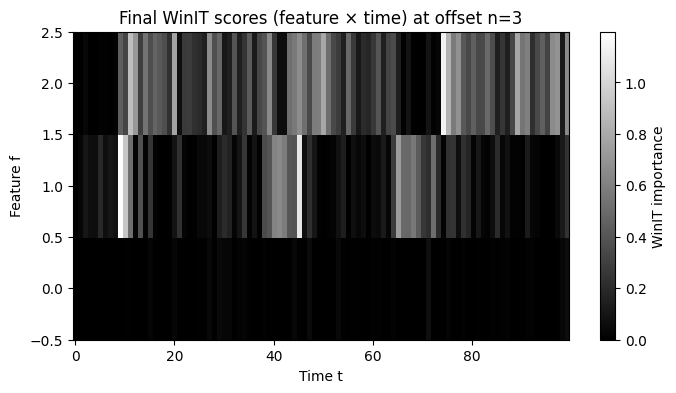

In [23]:
# final_scores shape is (1, F, T, w_max)
attr = scores[0]  # drop batch dimension → shape (F, T, w_max)

import matplotlib.pyplot as plt

# Choose an offset, e.g. n0 = 3
n0 = 3
slice_f_t = attr[:, :, :].mean(axis = 2)  # shape (F, T)

plt.figure(figsize=(8, 4))
im = plt.imshow(slice_f_t, aspect='auto', cmap='gray', origin='lower')
plt.colorbar(im, label="WinIT importance")
plt.xlabel("Time t")
plt.ylabel("Feature f")
plt.title(f"Final WinIT scores (feature × time) at offset n={n0}")
plt.show()


## debugging

In [101]:
import numpy as np

def build_mask(
    D: int,
    T: int,
    t_start: int,
    t_end:   int,
    d_start: int,
    height:  int = 1,
    slope:   float = 1.0
) -> np.ndarray:
    """
    Build a 0/1 mask of shape (D, T) by iterating over time t:
      - For t < t_start or t > t_end: M[:,t]=0
      - For t_start <= t <= t_end:
          compute alpha = (t - t_start)/(t_end - t_start)
          row = d_start + round( (alpha**slope)*(height-1) )
          set M[row, t] = 1
    Guarantees M[d_start, t_start] = 1 and M[d_start+height-1, t_end] = 1.
    """
    M = np.zeros((D, T), dtype=int)
    span = t_end - t_start

    if (height + d_start >= D):
        height = D - d_start


    # Special case: if height=1, just fill the horizontal strip
    if height <= 1 or span <=0:
        M[d_start, t_start:t_end+1] = 1
        print_mask(M)
        return M

    # Loop over each time column
    for t in range(t_start, t_end+1):
        alpha = (t - t_start) / span           # in [0..1]
        alpha_s = alpha ** slope               # bias by slope
        row = d_start + min(1, int(round(alpha_s * (height - 1))))
        M[row, t] = 1

    # Ensure start and end are set
    M[d_start,     t_start] = 1
    M[d_start+height-1, t_end  ] = 1

    print_mask(M)
    return M

def print_mask(M: np.ndarray):
    """Helper to print 0/1 rows."""
    D, T = M.shape
    print("Mask (D×T):")
    for r in range(D):
        print("".join(str(x) for x in M[r]))
    print()


import numpy as np

def build_upper_right_mask(
    D: int,
    T: int,
    t_start: int,
    t_end:   int,
    d_start: int,
    height:  int = 1,
    slope:   float = 1.0
) -> np.ndarray:
    """
    Build a mask M of shape (D, T) as follows:
      1) Compute, for each t in [t_start..t_end], a row index
         r(t) = d_start + round( ((t-t_start)/(t_end-t_start))**slope * (height-1) ).
      2) For each (r, t) along that path, set
           M[0:r+1,  t : t_end+1] = 1
         i.e. fill the “upper‐right” triangle anchored at (r, t).
      3) Leave everything else as 0.

    Guarantees:
      - M[d_start,      t_start] = 1
      - M[d_start+height-1, t_end] = 1
    """
    M = np.zeros((D, T), dtype=int)
    span = t_end - t_start

    if height <= 1 or span <= 0:
        # just fill upper triangle from the single row
        for t in range(t_start, t_end+1):
            M[d_start:d_start+1, t:t_end+1] = 1
        print_mask(M)
        return M

    # Loop over each time in the interval
    for t in range(t_start, t_end+1):
        alpha = (t - t_start) / span
        alpha_s = alpha ** slope
        r = d_start + int(round(alpha_s * (height - 1)))

        # fill rows 0..r and cols t..t_end
        M[d_start:r+1, t:t_end+1] = 1

    # ensure endpoints
    M[d_start,      t_start] = 1
    M[d_start+height-1, t_end]   = 1

    print_mask(M)
    return M

def print_mask(M: np.ndarray):
    """Print the mask matrix of 0/1."""
    D, T = M.shape
    print("Mask (D×T):")
    for r in range(D):
        print("".join(str(x) for x in M[r]))
    print()



In [102]:
mask1 = build_mask(D=5, T=10, t_start=3, t_end=7, d_start=2, height=1, slope=0.01)
mask1 = build_upper_right_mask(D=5, T=10, t_start=3, t_end=7, d_start=2, height=1, slope=0.01)


Mask (D×T):
0000000000
0000000000
0001111100
0000000000
0000000000

Mask (D×T):
0000000000
0000000000
0001111100
0000000000
0000000000



In [99]:
mask1 = build_mask(D=5, T=10, t_start=3, t_end=7, d_start=2, height=2, slope=0.01)
mask1 = build_upper_right_mask(D=5, T=10, t_start=3, t_end=7, d_start=2, height=2, slope=0.01)


Mask (D×T):
0000000000
0000000000
0001000000
0000111100
0000000000

Mask (D×T):
0000000000
0000000000
0001111100
0000111100
0000000000



In [98]:
mask2 = build_mask(D=5, T=10, t_start=3, t_end=8, d_start=2, height= 3, slope=0.0001)
mask2 = build_upper_right_mask(D=5, T=10, t_start=3, t_end=8, d_start=2, height= 3, slope=0.0001)


Mask (D×T):
0000000000
0000000000
0001000000
0000111110
0000000010

Mask (D×T):
0000000000
0000000000
0001111110
0000111110
0000111110

